In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_11240\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

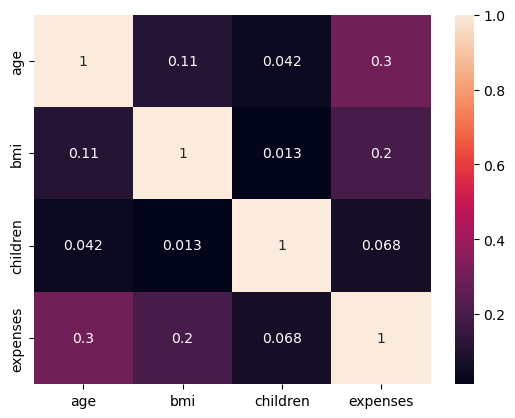

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.sex=le.fit_transform(df["sex"])

In [7]:
df.smoker=le.fit_transform(df["smoker"])

# ONE HOT ENCODING

In [8]:
df=pd.get_dummies(data=df,columns=["region"])

In [9]:
df

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,16884.92,0,0,0,1
1,18,1,33.8,1,0,1725.55,0,0,1,0
2,28,1,33.0,3,0,4449.46,0,0,1,0
3,33,1,22.7,0,0,21984.47,0,1,0,0
4,32,1,28.9,0,0,3866.86,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55,0,1,0,0
1334,18,0,31.9,0,0,2205.98,1,0,0,0
1335,18,0,36.9,0,0,1629.83,0,0,1,0
1336,21,0,25.8,0,0,2007.95,0,0,0,1


In [10]:
X=df.drop("expenses",axis=1)
Y=df["expenses"]

In [11]:
x1,x2,y1,y2=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
x1

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
693,24,1,23.7,0,0,0,1,0,0
1297,28,0,26.5,2,0,0,0,1,0
634,51,1,39.7,1,0,0,0,0,1
1022,47,1,36.1,1,1,0,0,1,0
178,46,0,28.9,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1095,18,0,31.4,4,0,1,0,0,0
1130,39,0,23.9,5,0,0,0,1,0
1294,58,1,25.2,0,0,1,0,0,0
860,37,0,47.6,2,1,0,0,0,1


In [13]:
y1

693      2352.97
1297     4340.44
634      9391.35
1022    42211.14
178      8823.28
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1003, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [15]:
model.predict([[20,1,30.0,0,1,1,0,0,0]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26922.5808304])

In [16]:
model.score(x2,y2)*100

76.72722578855357

In [17]:
yp=model.predict(x2)

In [18]:
yp[:3]

array([ 8959.6084306 ,  7046.45362801, 36891.48904809])

In [19]:
y2[:3]

764     9095.07
887     5272.18
890    29330.98
Name: expenses, dtype: float64

In [22]:
df[100:102]

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
100,41,0,31.6,0,0,6186.13,0,0,0,1
101,30,1,25.5,0,0,3645.09,1,0,0,0


In [26]:
new=[30,1,25.5,0,0,1,0,0,0]

In [27]:
model.predict([new])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4359.32503195])